In [67]:
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error

In [69]:
#SPY = SP500
tickers = ['SPY', 'AAL', 'AMZN', 'PFE', 'DB', 'WMT']
start_date='2012-01-01'
end_date='2022-10-14'
snp = yf.download(tickers[0], start=start_date, end=end_date)
american = yf.download(tickers[1], start=start_date, end=end_date)
amazon = yf.download(tickers[2], start=start_date, end=end_date)
pfizer = yf.download(tickers[3], start=start_date, end=end_date)
d_bank = yf.download(tickers[4], start=start_date, end=end_date)
walmart = yf.download(tickers[5], start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [70]:
snp = snp[["Adj Close"]]
snp.rename(columns={'Adj Close':'adj_close'}, inplace=True)
american = american[["Adj Close"]]
american.rename(columns={'Adj Close':'adj_close'}, inplace=True)
amazon = amazon[["Adj Close"]]
amazon.rename(columns={'Adj Close':'adj_close'}, inplace=True)
pfizer = pfizer[["Adj Close"]]
pfizer.rename(columns={'Adj Close':'adj_close'}, inplace=True)
d_bank = d_bank[["Adj Close"]]
d_bank.rename(columns={'Adj Close':'adj_close'}, inplace=True)
walmart = walmart[["Adj Close"]]
walmart.rename(columns={'Adj Close':'adj_close'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# S&P 500

In [71]:
train = snp.iloc[:int(snp.shape[0]*0.8)]
test = snp.iloc[int(snp.shape[0]*0.8):]

model = auto_arima(train, start_p=1, start_q=1,
                     max_p=5, max_q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [72]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 3305.102
MSLE: 0.021
MAPE: 0.114


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


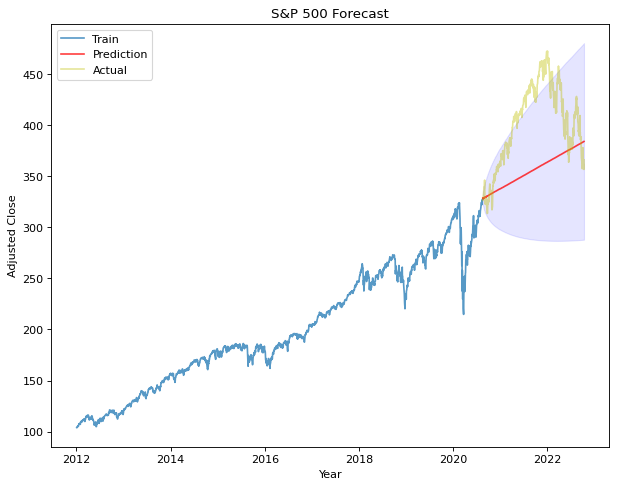

In [73]:
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

figure(figsize=(9, 7), dpi=80)
plt.plot(train.index, train.adj_close, alpha=0.75, label='Train')
plt.plot(test.index, preds, alpha=0.75, label='Prediction', color = 'r')  
plt.plot(test.index, test.adj_close,
            alpha=0.4, label= 'Actual', color = 'y')  
plt.fill_between(test.index,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("S&P 500 Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [74]:
cv = model_selection.SlidingWindowForecastCV(window_size=10, step=24, h=1)
model_cv_scores = model_selection.cross_val_score(
    model, train, scoring='smape', cv=cv)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

In [75]:
print("Mean error rate: {}".format(np.average(model_cv_scores)))

Mean error rate: 1.0402676622427371


#AAL

In [76]:
train = american.iloc[:int(american.shape[0]*0.8)]
test = american.iloc[int(american.shape[0]*0.8):]

model = auto_arima(train, start_p=1, start_q=1,
                     max_p=5, max_q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [77]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 36.291
MSLE: 0.121
MAPE: 0.256


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


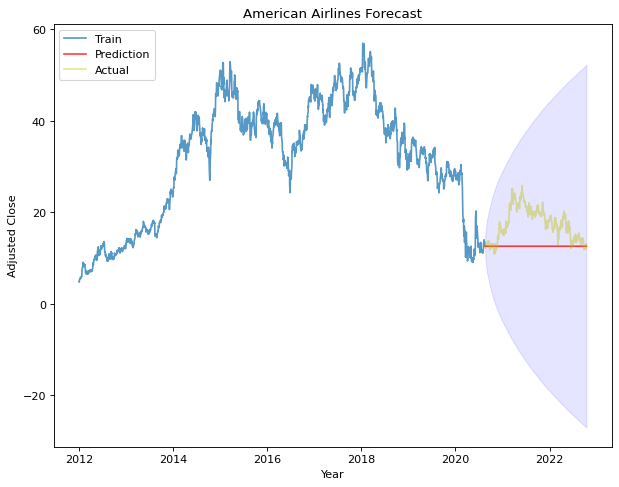

In [78]:
figure(figsize=(9, 7), dpi=80)
plt.plot(train.index, train.adj_close, alpha=0.75, label='Train')
plt.plot(test.index, preds, alpha=0.75, label='Prediction', color = 'r')  
plt.plot(test.index, test.adj_close,
            alpha=0.4, label= 'Actual', color = 'y')  
plt.fill_between(test.index,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("American Airlines Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [79]:
cv = model_selection.SlidingWindowForecastCV(window_size=10, step=24, h=1)
model_cv_scores = model_selection.cross_val_score(
    model, train, scoring='smape', cv=cv)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

In [80]:
print("Mean error rate: {}".format(np.average(model_cv_scores)))

Mean error rate: 2.395110356882797


#Amazon

In [81]:
train = amazon.iloc[:int(amazon.shape[0]*0.8)]
test = amazon.iloc[int(amazon.shape[0]*0.8):]

model = auto_arima(train, start_p=1, start_q=1,
                     max_p=5, max_q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [82]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 564997.117
MSLE: 2.718
MAPE: 4.547


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


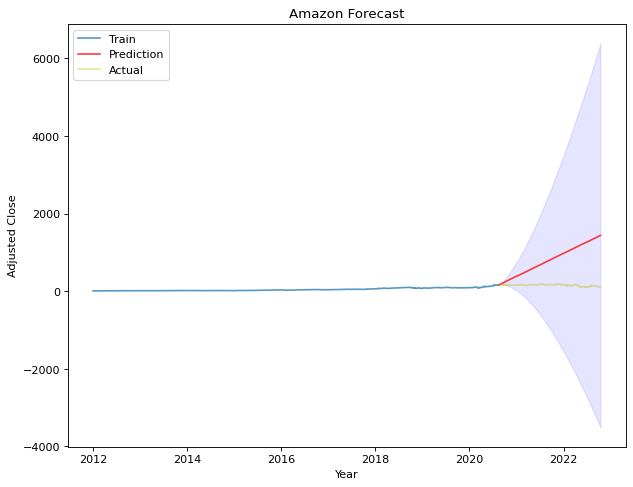

In [83]:
figure(figsize=(9, 7), dpi=80)
plt.plot(train.index, train.adj_close, alpha=0.75, label='Train')
plt.plot(test.index, preds, alpha=0.75, label='Prediction', color = 'r')  
plt.plot(test.index, test.adj_close,
            alpha=0.4, label= 'Actual', color = 'y')  
plt.fill_between(test.index,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Amazon Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [84]:
cv = model_selection.SlidingWindowForecastCV(window_size=10, step=24, h=1)
model_cv_scores = model_selection.cross_val_score(
    model, train, scoring='smape', cv=cv)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

ValueError: ignored

In [ ]:
print("Mean error rate: {}".format(np.average(model_cv_scores)))

#Pfizer

In [87]:
train = pfizer.iloc[:int(pfizer.shape[0]*0.8)]
test = pfizer.iloc[int(pfizer.shape[0]*0.8):]

model = auto_arima(train, start_p=1, start_q=1,
                     max_p=5, max_q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [88]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 132.825
MSLE: 0.075
MAPE: 0.193


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


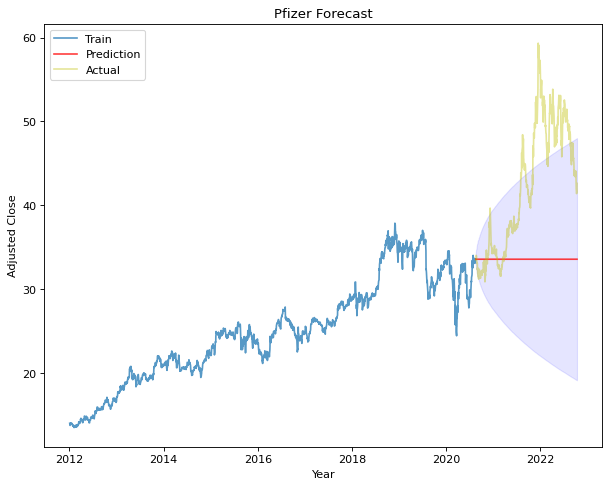

In [89]:
figure(figsize=(9, 7), dpi=80)
plt.plot(train.index, train.adj_close, alpha=0.75, label='Train')
plt.plot(test.index, preds, alpha=0.75, label='Prediction', color = 'r')  
plt.plot(test.index, test.adj_close,
            alpha=0.4, label= 'Actual', color = 'y')  
plt.fill_between(test.index,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Pfizer Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [90]:
cv = model_selection.SlidingWindowForecastCV(window_size=10, step=24, h=1)
model_cv_scores = model_selection.cross_val_score(
    model, train, scoring='smape', cv=cv)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

In [91]:
print("Mean error rate: {}".format(np.average(model_cv_scores)))

Mean error rate: 0.9422602849489916


#Deutsche

In [92]:
train = d_bank.iloc[:int(d_bank.shape[0]*0.8)]
test = d_bank.iloc[int(d_bank.shape[0]*0.8):]

model = auto_arima(train, start_p=1, start_q=1,
                     max_p=5, max_q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [93]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 7.720
MSLE: 0.054
MAPE: 0.191


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


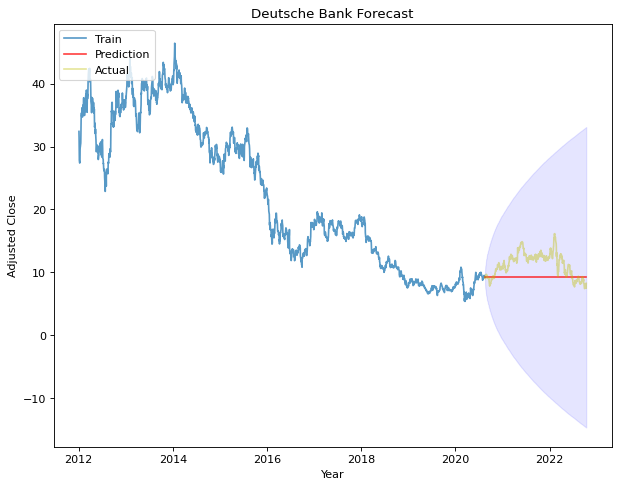

In [94]:
figure(figsize=(9, 7), dpi=80)
plt.plot(train.index, train.adj_close, alpha=0.75, label='Train')
plt.plot(test.index, preds, alpha=0.75, label='Prediction', color = 'r')  
plt.plot(test.index, test.adj_close,
            alpha=0.4, label= 'Actual', color = 'y')  
plt.fill_between(test.index,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Deutsche Bank Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [95]:
cv = model_selection.SlidingWindowForecastCV(window_size=10, step=24, h=1)
model_cv_scores = model_selection.cross_val_score(
    model, train, scoring='smape', cv=cv)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

In [96]:
print("Mean error rate: {}".format(np.average(model_cv_scores)))

Mean error rate: 1.7803109445766654


#Walmart

In [97]:
train = walmart.iloc[:int(walmart.shape[0]*0.8)]
test = walmart.iloc[int(walmart.shape[0]*0.8):]

model = auto_arima(train, start_p=1, start_q=1,
                     max_p=5, max_q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [98]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 117.107
MSLE: 0.006
MAPE: 0.059


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


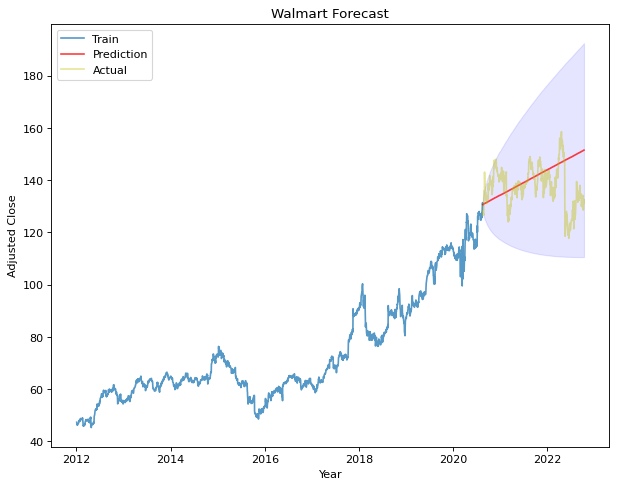

In [99]:
figure(figsize=(9, 7), dpi=80)
plt.plot(train.index, train.adj_close, alpha=0.75, label='Train')
plt.plot(test.index, preds, alpha=0.75, label='Prediction', color = 'r')  
plt.plot(test.index, test.adj_close,
            alpha=0.4, label= 'Actual', color = 'y')  
plt.fill_between(test.index,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Walmart Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [100]:
cv = model_selection.SlidingWindowForecastCV(window_size=10, step=24, h=1)
model_cv_scores = model_selection.cross_val_score(
    model, train, scoring='smape', cv=cv)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

In [101]:
print("Mean error rate: {}".format(np.average(model_cv_scores)))

Mean error rate: 0.8584560890677914
